In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def F_m(vx, vy, vz, T, n, Mol):
    Rg = 8.3144598 / Mol
    return n * ((1. / (2. * np.pi * Rg * T)) ** (3. / 2.)) * (np.exp(-((vx)**2 + (vy)**2 + (vz)**2) / (2. * Rg * T)))


def J(f, vmax, N):
    #fundamental constants
    Na = 6.02214129e+23
    kB = 1.381e-23 # J * K
    
    #gas parameters
    Mol = 40e-3 # kg
    Rg = 8.3144598  / Mol  # J / (mol * K) 
    m = Mol / Na # kg
    
    Pr = 2. / 3.
    C = 144.4
    T_0 = 273.11
    mu_0 = 2.125e-05

    #vmax = np.sqrt(2 * Rg * T) * 4
    #L = 21
    
    hv = 2. * vmax / N
    vx_ = np.linspace(-vmax+hv/2, vmax-hv/2, N)

    vx, vy, vz = np.meshgrid(vx_, vx_, vx_, indexing='ij')

    assert np.all(vx[:,0,0] == vx_)
    assert np.all(vy[0,:,0] == vx_)
    assert np.all(vz[0,0,:] == vx_)

    n = (hv ** 3) * np.sum(f)

    ux = (1. / n) * (hv ** 3) * np.sum(vx * f)
    uy = (1. / n) * (hv ** 3) * np.sum(vy * f)
    uz = (1. / n) * (hv ** 3) * np.sum(vz * f)
    
    T = (1. / 3. / n / Rg) * ((hv ** 3) * np.sum((vx*vx + vy*vy + vz*vz) * f) - n * (ux*ux + uy*uy + uz*uz))

    Vx = vx - ux
    Vy = vy - uy
    Vz = vz - uz

    rho = m * n

    p = rho * Rg * T

    cx = Vx / ((2. * Rg * T) ** (1. / 2.))
    cy = Vy / ((2. * Rg * T) ** (1. / 2.))
    cz = Vz / ((2. * Rg * T) ** (1. / 2.))

    Sx = (1. / n) * (hv ** 3) * np.sum(cx * (cx*cx + cy*cy + cz*cz) * f)
    Sy = (1. / n) * (hv ** 3) * np.sum(cy * (cx*cx + cy*cy + cz*cz) * f)
    Sz = (1. / n) * (hv ** 3) * np.sum(cz * (cx*cx + cy*cy + cz*cz) * f)
    
    mu = mu_0 * ((T_0 + C) / (T + C)) * ((T / T_0) ** (3. / 2.))


    f_plus = F_m(Vx, Vy, Vz, T, n, Mol) * (1. + (4. / 5.) * (1. - Pr) * (cx*Sx + cy*Sy + cz*Sz) * (cx*cx + cy*cy + cz*cz - (5. / 2.)))
    
    print (1. + (4. / 5.) * (1. - Pr) * (cx*Sx + cy*Sy + cz*Sz) * (cx*cx + cy*cy + cz*cz - (5. / 2.)))
    
    J = (p / mu) * (f_plus - f)

    print n, T
    print ux, uy, uz
    print Sx, Sy, Sz
    
    return J

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]
1.99999999

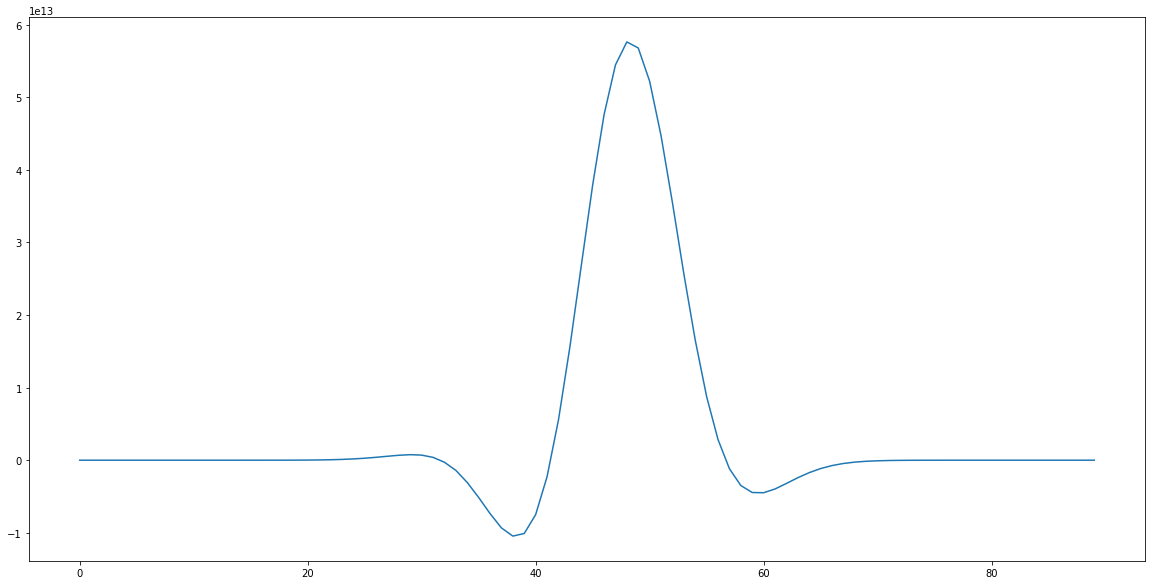

In [22]:
N = 90
vmax = 2000.

hv = 2. * vmax / N
vx_ = np.linspace(-vmax+hv/2, vmax-hv/2, N)

vx, vy, vz = np.meshgrid(vx_, vx_, vx_, indexing='ij')

n = 2e+25

T = 300.

Mol = 40e-3

f = F_m(vx-50., vy, vz, T, n, Mol)

JJ = J(f, vmax, N)

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(JJ[:, N/2, N/2])
print hv * hv * hv * np.sum(JJ)